In [17]:
# Add your imports here

import os
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
project_path = os.getcwd() + '/'

browser_data_path = 'data/'
pycharm_data_path = project_path + 'hw_1/data/'

selected_data_path = browser_data_path
# selected_data_path = pycharm_data_path

fr_dish_choice_data_path = selected_data_path + 'Friends_Dish_Choices.txt'
fr_relation_data_path = selected_data_path + 'Friends_Relation.txt'

In [3]:
with open(fr_dish_choice_data_path) as f:
    fr_dish_choice_file_content = f.readlines()

fr_dish_choice_file_content = [x.strip('\n').strip('\r').split('\t')[1:] for x in fr_dish_choice_file_content]

fr_dish_choice_file_content.pop(0)

list_of_friends = set([item[0] for item in fr_dish_choice_file_content])

fr_dish_choice_file_content_nodes = set([item for sublist in fr_dish_choice_file_content for item in sublist])

print fr_dish_choice_file_content_nodes


set(['Laiba', 'Vali', 'Jahanzaib', 'Anas', 'Sindhi Biryani', 'Ghaffar', 'Seekh Kabab', 'Fish', 'Daal Chawal', 'Paras', 'Karahi', 'Nihari', 'Chicken Handi', 'Chand', 'Faiza', 'Afgani Tikkah', 'Mandi', 'Suji Halwa', 'Mutton Pulao'])


In [4]:
G_fr_dish_choice = nx.Graph()

G_fr_dish_choice.add_nodes_from(fr_dish_choice_file_content_nodes)

for relationship in fr_dish_choice_file_content:
    G_fr_dish_choice.add_edge(relationship[0], relationship[1])

print G_fr_dish_choice.edges()

[('Vali', 'Suji Halwa'), ('Vali', 'Nihari'), ('Vali', 'Seekh Kabab'), ('Afgani Tikkah', 'Ghaffar'), ('Afgani Tikkah', 'Chand'), ('Afgani Tikkah', 'Anas'), ('Anas', 'Chicken Handi'), ('Anas', 'Mandi'), ('Sindhi Biryani', 'Ghaffar'), ('Sindhi Biryani', 'Chand'), ('Ghaffar', 'Mutton Pulao'), ('Mandi', 'Jahanzaib'), ('Mandi', 'Laiba'), ('Fish', 'Jahanzaib'), ('Fish', 'Laiba'), ('Daal Chawal', 'Paras'), ('Paras', 'Seekh Kabab'), ('Paras', 'Chicken Handi'), ('Karahi', 'Jahanzaib'), ('Karahi', 'Laiba'), ('Chand', 'Mutton Pulao'), ('Chicken Handi', 'Faiza'), ('Faiza', 'Seekh Kabab'), ('Faiza', 'Suji Halwa')]


In [5]:
def getNodeType(node):
    if node in list_of_friends:
        return 'Friend'
    else:
        return 'Dish'


In [6]:
for node in G_fr_dish_choice.nodes():
    G_fr_dish_choice.node[node]['type'] = getNodeType(node)

print G_fr_dish_choice.nodes(data=True)

[('Vali', {'type': 'Friend'}), ('Afgani Tikkah', {'type': 'Dish'}), ('Anas', {'type': 'Friend'}), ('Sindhi Biryani', {'type': 'Dish'}), ('Ghaffar', {'type': 'Friend'}), ('Mandi', {'type': 'Dish'}), ('Fish', {'type': 'Dish'}), ('Daal Chawal', {'type': 'Dish'}), ('Paras', {'type': 'Friend'}), ('Karahi', {'type': 'Dish'}), ('Nihari', {'type': 'Dish'}), ('Laiba', {'type': 'Friend'}), ('Chand', {'type': 'Friend'}), ('Chicken Handi', {'type': 'Dish'}), ('Faiza', {'type': 'Friend'}), ('Jahanzaib', {'type': 'Friend'}), ('Seekh Kabab', {'type': 'Dish'}), ('Suji Halwa', {'type': 'Dish'}), ('Mutton Pulao', {'type': 'Dish'})]


In [22]:
friends, dishes = nx.bipartite.sets(G_fr_dish_choice)

G_bipartite_dishes = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, dishes)

G_bipartite_friends = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, friends)


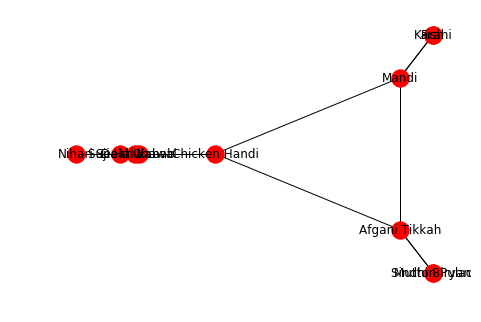

In [23]:
nx.draw_spectral(G_bipartite_dishes, with_labels=True)

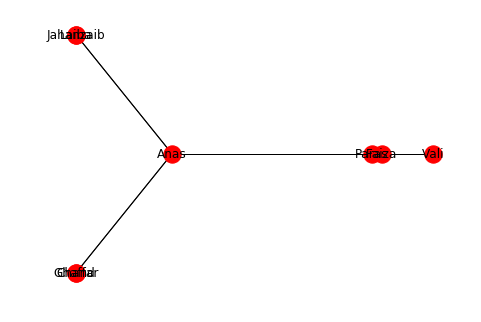

In [24]:
nx.draw_spectral(G_bipartite_friends, with_labels=True)